In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


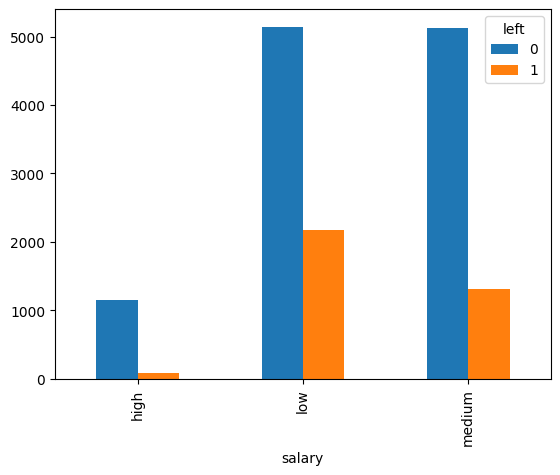

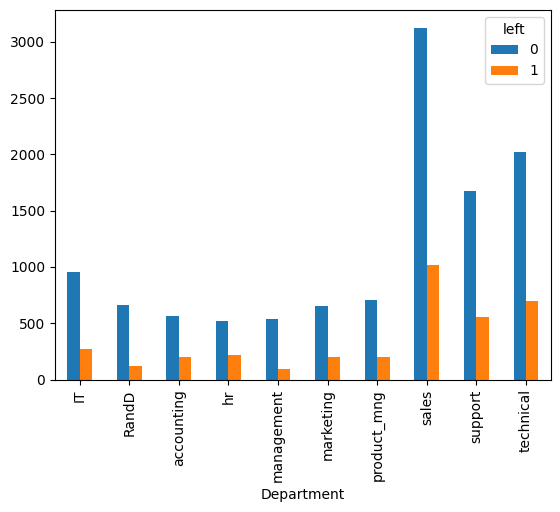

In [104]:
#Finding Relations between df.left and other variables.
df = pd.read_csv('5) HR data.csv')
pd.crosstab(df.salary,df.left).plot(kind='bar')
pd.crosstab(df.Department,df.left).plot(kind='bar')
df

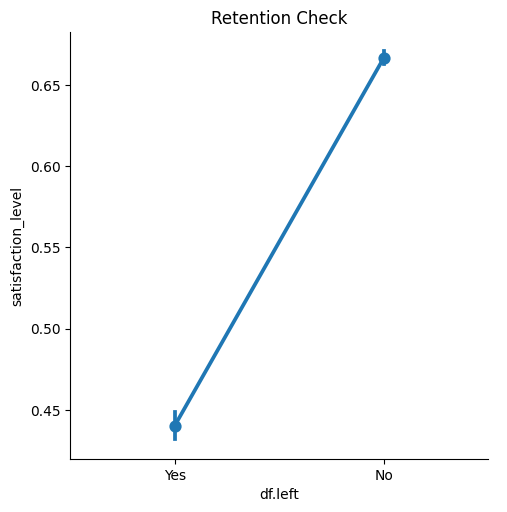

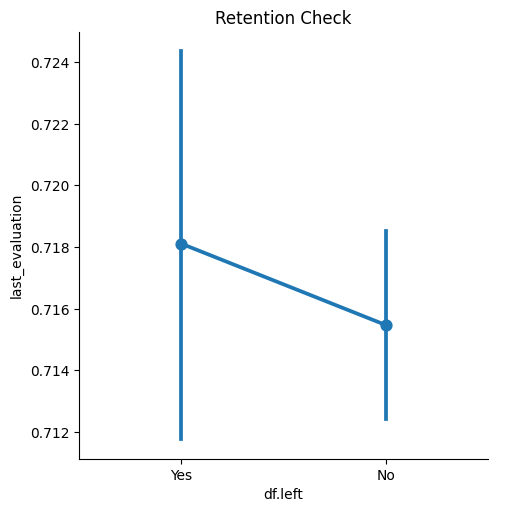

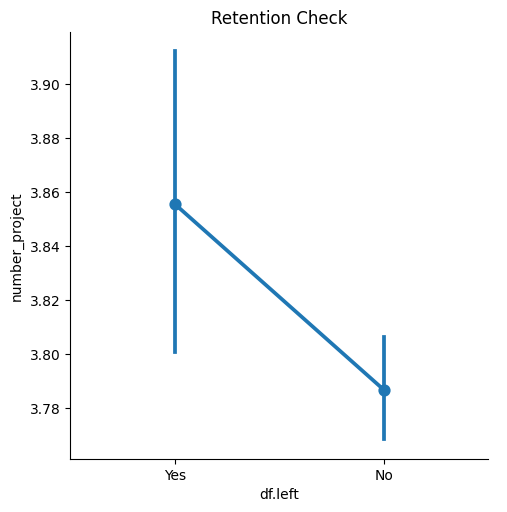

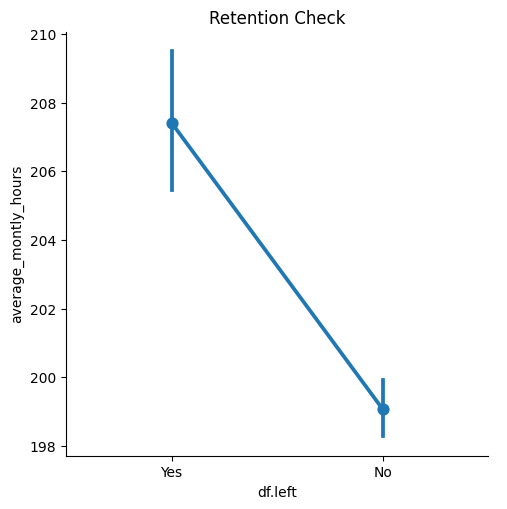

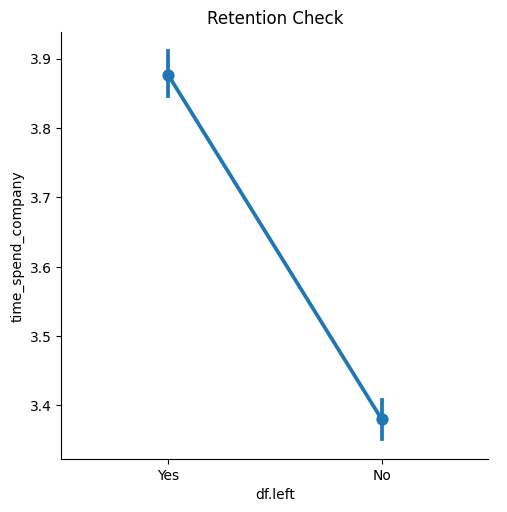

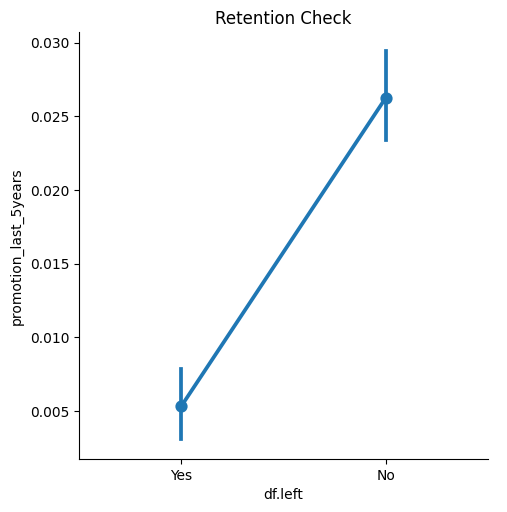

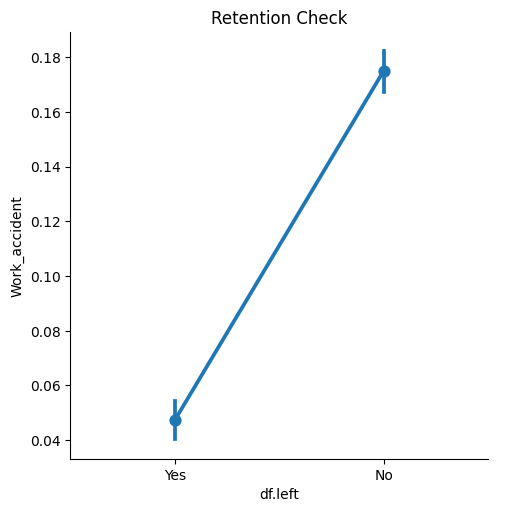

In [105]:
df1 = df
df1.left = df.left.replace({1:'Yes',0:'No'})
for i in [df1.satisfaction_level,df1.last_evaluation,df1.number_project,df1.average_montly_hours,df1.time_spend_company,df1.promotion_last_5years,df1.Work_accident]:
    sns.catplot(x='left',y=i,data=df1,kind='point')
    plt.ylabel(f'{i.name}')
    plt.xlabel('df.left')
    plt.title('Retention Check')
    plt.show()

In [106]:
#We concluded satisfaction_level, salary, Department[but not significant], promotion_last_5years, average_monthly_hours are related with df.left. Now we will buid our logistic regression model.
df1 = df
df1 = pd.concat([df,pd.get_dummies(df.salary)], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df1[['satisfaction_level','high','low','medium', 'promotion_last_5years', 'average_montly_hours']],df.left, train_size=0.5)

In [107]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [108]:
#auto score checking
model.score(x_test,y_test)

0.7765333333333333

In [109]:
#manual score checking
predictions = model.predict(x_test).tolist()
reality = y_test.tolist()
correct = 0
incorrect = 0
for i in range(len(predictions)):
    if predictions[i] == reality[i]:
        correct += 1
    else:
        incorrect += 1
print(f'Correct: {correct}')
print(f'Incorrect: {incorrect}')
print('Accuracy:', correct/len(predictions))

Correct: 5824
Incorrect: 1676
Accuracy: 0.7765333333333333
